In [3]:
import cv2
import numpy as np
from kaggle_secrets import UserSecretsClient
# Print upload instructions for the OpenCV face detector weights file (.pb and .pbtxt files)


# Use the UserSecretsClient to upload files
user_secrets = UserSecretsClient()
weights_file_path = user_secrets.get_secret("weight_path")
print("Uploaded weights file:", weights_file_path)


Uploaded weights file: /kaggle/input/face-weight/opencv_face_detector_uint8.pb


In [4]:
# Print upload instructions for the OpenCV face detector model architecture file (.pb and .pbtxt files)
print("Please upload the OpenCV face detector model architecture file (.pb and .pbtxt files)")

# Use the UserSecretsClient to upload files again
architecture_file_path = user_secrets.get_secret("arc_file_path")
print("Uploaded architecture file:", architecture_file_path)

Please upload the OpenCV face detector model architecture file (.pb and .pbtxt files)
Uploaded architecture file: /kaggle/input/face-weight/opencv_face_detector.pbtxt


In [5]:

# Load the OpenCV face detector model
net = cv2.dnn.readNetFromTensorflow(weights_file_path, architecture_file_path)


In [5]:
import cv2
import os

def detect_and_crop_face(image_path, net):
    # Load the image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to read image at {image_path}")
        return None

    height, width = img.shape[:2]
    
    # Convert image to blob format for input to the neural network
    blob = cv2.dnn.blobFromImage(img, scalefactor=1.0, size=(300, 300), mean=(104.0, 177.0, 123.0))
    
    # Set the input to the neural network
    net.setInput(blob)
    
    # Forward pass through the network to perform face detection
    detections = net.forward()
    
    # Check if a face is detected
    if detections.shape[2] == 0:
        print(f"No face detected in {image_path}")
        return None
    
    # Get the coordinates of the bounding box for the first detected face
    confidence = detections[0, 0, 0, 2]
    if confidence > 0.5:  # Adjust confidence threshold as needed
        box = detections[0, 0, 0, 3:7] * np.array([width, height, width, height])
        (startX, startY, endX, endY) = box.astype("int")
        
        # Crop the face region from the image
        face = img[startY:endY, startX:endX]
        return face
    else:
        print(f"Face detection confidence too low in {image_path}")
        return None

# Directory containing the original dataset
original_dataset_dir = '/kaggle/input/pins-face-recognition/105_classes_pins_dataset'

# Temporary directory to store cropped images
temp_cropped_dir = '/kaggle/working/temp_cropped_images2'

# Create the temporary directory if it doesn't exist
os.makedirs(temp_cropped_dir, exist_ok=True)

# Iterate through the original dataset
for root, dirs, files in os.walk(original_dataset_dir):
    for filename in files:
        # Path to the original image
        original_image_path = os.path.join(root, filename)
        
        # Get the class name (directory name)
        class_name = os.path.basename(root)
        
        # Create the corresponding directory in the temporary directory
        temp_class_dir = os.path.join(temp_cropped_dir, class_name)
        os.makedirs(temp_class_dir, exist_ok=True)
        
        # Perform face detection and cropping
        cropped_face = detect_and_crop_face(original_image_path, net)
        
        # Save the cropped face to the temporary directory if a face is detected,
        # otherwise, copy the original image to the temporary directory
        if cropped_face is not None:
            cropped_image_path = os.path.join(temp_class_dir, filename)
            cv2.imwrite(cropped_image_path, cropped_face)
        else:
            # Copy the original image to the temporary directory
            temp_image_path = os.path.join(temp_class_dir, filename)
            shutil.copy(original_image_path, temp_image_path)

KeyboardInterrupt: 

In [6]:
import cv2
from PIL import Image
# Function to perform face detection on a static photo
def detect_faces(net, frame):
    # Load the frame/image
#     frame = cv2.imread(frame_path)
    
    # Perform face detection
    blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300), [104., 177., 123.], False, False)
    net.setInput(blob)
    detections = net.forward()

    detected_image = frame.copy()  # Create a copy of the original image for drawing detections

    # Process the detections
    face_coords = None  # Initialize face coordinates
    for i in range(0, detections.shape[2]):
        # Get the confidence (probability) of the current detection:
        confidence = detections[0, 0, i, 2]
        # Only consider detections if confidence is greater than a fixed minimum confidence:
        if confidence > 0.7:
            # Get the coordinates of the current detection:
            box = detections[0, 0, i, 3:7] * np.array([frame.shape[1], frame.shape[0], frame.shape[1], frame.shape[0]])
            (startX, startY, endX, endY) = box.astype("int")
            face_coords = (startX, startY, endX, endY)  # Store face coordinates
            # Draw the detection and the confidence:
#             text = "{:.3f}%".format(confidence * 100)
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.rectangle(detected_image, (startX, startY), (endX, endY), (255, 0, 0), 3)
#             cv2.putText(detected_image, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)
            break  # Exit the loop after the first detection

    # Convert the frame back to RGB for displaying with matplotlib
    detected_image_rgb = cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB)
    
#     # Display the result
#     plt.imshow(detected_image_rgb)
#     plt.axis('off')  # Turn off axis
#     plt.show()

    return detected_image, face_coords

In [43]:
import cv2
import numpy as np
from IPython.display import Image
from PIL import Image as PIL_Image
from io import BytesIO

try:
    # Capture the photo
    filename = take_photo()
    print('Saved to {}'.format(filename))

    # Load the image using PIL
    img_pil = PIL_Image.open(filename)

    # Convert PIL Image to NumPy array
    img_np = np.array(img_pil)

    # Show the image which was just taken.
    display(Image(filename))

except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

Error: Could not open webcam
Saved to None
'NoneType' object has no attribute 'read'


[ WARN:0@15803.061] global cap_v4l.cpp:997 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@15803.061] global obsensor_uvc_stream_channel.cpp:159 getStreamChannelGroup Camera index out of range


In [ ]:
detect_faces(net, img_np)

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
train_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [7]:
train_set = train_datagen.flow_from_directory('/kaggle/working/temp_cropped_images2',
                                              target_size =(150, 150),
                                              batch_size =32,
                                              class_mode = 'categorical')

NameError: name 'train_datagen' is not defined

In [49]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import TopKCategoricalAccuracy
from tensorflow.keras.callbacks import ReduceLROnPlateau
local_weights_file = '/kaggle/input/face-weight/inception_v3_weights_tf_dim_ordering_tf_kernels.h5'
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = True, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    if 'mixed7' in layer.name:
        break
    layer.trainable = False
        
#pre_trained_model.summary()
last_layer = pre_trained_model.get_layer('mixed7')

# print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(105, activation='softmax')(x)
predictions = layers.Dense(105, activation='softmax')(x)

# Model
model = Model(pre_trained_model.input, x)        

# Learning Rate Scheduling
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=3, min_lr=0.00001)


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model.fit(train_set, epochs=40)

Epoch 1/40
  1/548 ━━━━━━━━━━━━━━━━━━━━ 1:49:35 12s/step - accuracy: 0.0000e+00 - loss: 5.6120

W0000 00:00:1713122491.768503      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


472/548 ━━━━━━━━━━━━━━━━━━━━ 16s 214ms/step - accuracy: 0.0791 - loss: 4.4323

W0000 00:00:1713122592.316823      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


548/548 ━━━━━━━━━━━━━━━━━━━━ 127s 210ms/step - accuracy: 0.0862 - loss: 4.3535
Epoch 2/40
548/548 ━━━━━━━━━━━━━━━━━━━━ 112s 202ms/step - accuracy: 0.2544 - loss: 3.0419
Epoch 3/40
548/548 ━━━━━━━━━━━━━━━━━━━━ 112s 202ms/step - accuracy: 0.3180 - loss: 2.7242
Epoch 4/40
548/548 ━━━━━━━━━━━━━━━━━━━━ 113s 204ms/step - accuracy: 0.3623 - loss: 2.5065
Epoch 5/40
548/548 ━━━━━━━━━━━━━━━━━━━━ 113s 203ms/step - accuracy: 0.3980 - loss: 2.3646
Epoch 6/40
548/548 ━━━━━━━━━━━━━━━━━━━━ 112s 202ms/step - accuracy: 0.4150 - loss: 2.2840
Epoch 7/40
548/548 ━━━━━━━━━━━━━━━━━━━━ 111s 201ms/step - accuracy: 0.4188 - loss: 2.2659
Epoch 8/40
548/548 ━━━━━━━━━━━━━━━━━━━━ 111s 200ms/step - accuracy: 0.4398 - loss: 2.1543
Epoch 9/40
548/548 ━━━━━━━━━━━━━━━━━━━━ 112s 203ms/step - accuracy: 0.4537 - loss: 2.1148
Epoch 10/40
548/548 ━━━━━━━━━━━━━━━━━━━━ 112s 202ms/step - accuracy: 0.4603 - loss: 2.0631
Epoch 11/40
548/548 ━━━━━━━━━━━━━━━━━━━━ 112s 201ms/step - accuracy: 0.4659 - loss: 2.0373
Epoch 12/40
548/548

In [60]:

model.save('/kaggle/working/model.h5')

In [8]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('/kaggle/input/recognition-model/model.h5')

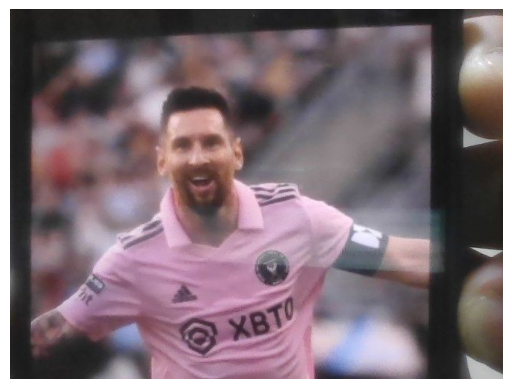

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from PIL import Image as PIL_Image
# Load the image using PIL
img_pil = PIL_Image.open('/kaggle/input/messiii/photo.jpg')

# Convert PIL Image to NumPy array
img_np = np.array(img_pil)
plt.imshow(img_pil)
plt.axis('off')  # Turn off axis
plt.show()


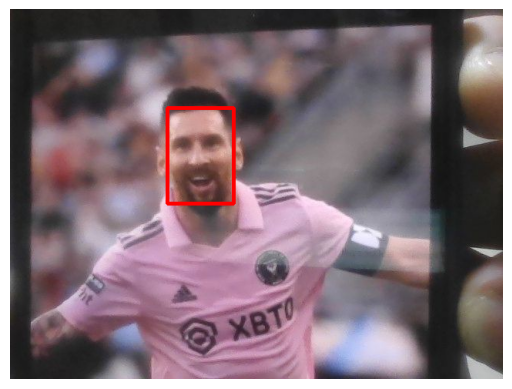

In [60]:
import cv2
detected_image, face_coords = detect_faces(net, img_np)
plt.imshow(detected_image)
plt.axis('off')  # Turn off axis
plt.show()

In [32]:
import os

def load_class_names_from_directories(dataset_dir):
    class_names = {}
    class_id = 0
    for dir_name in sorted(os.listdir(dataset_dir)):
        if os.path.isdir(os.path.join(dataset_dir, dir_name)):
            modified_name = dir_name[5:]  # Remove first 5 characters
            class_names[class_id] = modified_name
            class_id += 1
    return class_names

In [11]:
def recognize_face(loaded_recognition_model, frame, startX, startY, endX, endY, class_names):
    # Extract face image
    face_img = frame[startY:endY, startX:endX]
    # Preprocess face image for model input
    face_img = cv2.resize(face_img, (150, 150))
    face_img = face_img / 255.0
    face_img = np.expand_dims(face_img, axis=0)
    # Predict class for the face
    predictions = loaded_recognition_model.predict(face_img)
    # Get predicted class label
    predicted_class = np.argmax(predictions)
    
    # Get the class name based on the label
    class_name = class_names[predicted_class]

    return class_name

In [ ]:
def extract_features(img):
    img = preprocess_image(img)
    img = np.expand_dims(img, axis=0)
    features = model.predict(img)
    return features

In [61]:
def draw_box_with_text(image, startX, startY, endX, endY, class_name):
    color = (255, 0, 0)  # BGR color format (red)
    thickness = 2
    cv2.rectangle(image, (startX, startY), (endX, endY), color, thickness)
    text = class_name
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.9
    text_thickness = 2
    text_size = cv2.getTextSize(text, font, font_scale, text_thickness)[0]
    cv2.putText(image, text, (startX, startY - 10), font, font_scale, color, text_thickness)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


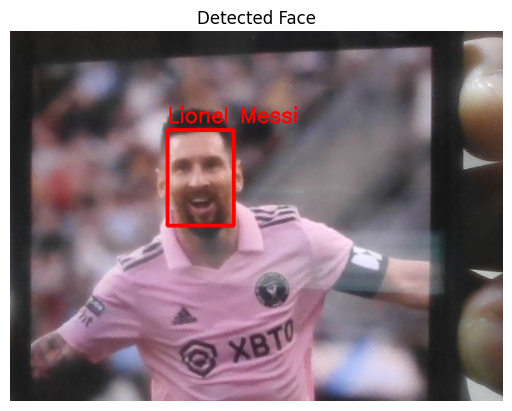

In [62]:
detected_image, face_coords = detect_faces(net, img_np)
# Extract face coordinates
startX, startY, endX, endY = face_coords
dataset_dir = '/kaggle/input/pins-face-recognition/105_classes_pins_dataset'  # Update with the path to your dataset directory
class_names = load_class_names_from_directories(dataset_dir)
# Recognize the face in the detected image
predicted_class = recognize_face(loaded_model, detected_image, startX, startY, endX, endY,class_names)

# Draw the bounding box and text on the detected image
draw_box_with_text(detected_image, startX, startY, endX, endY, predicted_class)

plt.imshow(detected_image)
plt.title('Detected Face')
plt.axis('off')  # Turn off axis
plt.show()

In [53]:
def predict_class(input_face_feature, known_face_features, threshold):
    similarities = cosine_similarity([input_face_feature], known_face_features)
    if np.max(similarities) > threshold:
        assigned_class_index = np.argmax(similarities)
        assigned_class = train_set.class_indices[assigned_class_index]
    else:
        assigned_class = "unknown"
    return assigned_class